In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data from the CSV file
file_path = 'Data\struct3.csv'
data = pd.read_csv(file_path)

In [3]:
# Separate the data into 'dbpedia' and 'wiki' datasets
dbpedia_data = data[data['File'].str.contains('dbpedia')].drop(columns= ['Unnamed: 0'])
wiki_data = data[data['File'].str.contains('wiki')].drop(columns= ['Unnamed: 0'])

In [11]:
wiki_data

,File,Version,Density,CC,KD,VocUni,Vdyn,AddVdyn,RemVdyn,ChangeRatio,AddCR,RemCR,Growth
12,http://example.com/wiki_20140526,0,0.0,0,2.19131,0.458562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
13,http://example.com/wiki_20140804,1,0.0,0,2.37421,0.448906,0.157652,0.142548,0.015104,0.283052,0.261225,0.090068,1.17116
14,http://example.com/wiki_20141110,2,0.0,0,2.56068,0.434743,0.139196,0.107383,0.031813,0.256290,0.211778,0.093174,1.11860
15,http://example.com/wiki_20150223,3,0.0,0,2.70159,0.425291,0.209715,0.130400,0.079314,0.333496,0.263718,0.148740,1.11498
16,http://example.com/wiki_20150601,4,0.0,0,2.82759,0.423513,0.091360,0.086087,0.005273,0.101548,0.101178,0.008331,1.09285
17,http://example.com/wiki_20150817,5,0.0,0,2.82579,0.426198,0.074421,0.070944,0.003477,0.106787,0.090064,0.023699,1.06636
18,http://example.com/wiki_20151012,6,0.0,0,3.23276,0.424684,0.080762,0.059041,0.021721,0.072117,0.060254,0.014404,1.04585
19,http://example.com/wiki_20151228,7,0.0,0,2.73739,0.434970,0.332229,0.046792,0.285437,0.380801,0.059841,0.333752,0.72609
20,http://example.com/wiki_20160328,8,0.0,0,3.76407,0.398193,0.397697,0.352009,0.045688,0.433972,0.661779,0.038909,1.62287
21,http://example.com/wiki_20160621,9,0.0,0,3.89862,0.395381,0.070622,0.065329,0.005293,0.091866,0.086214,0.010563,1.07565


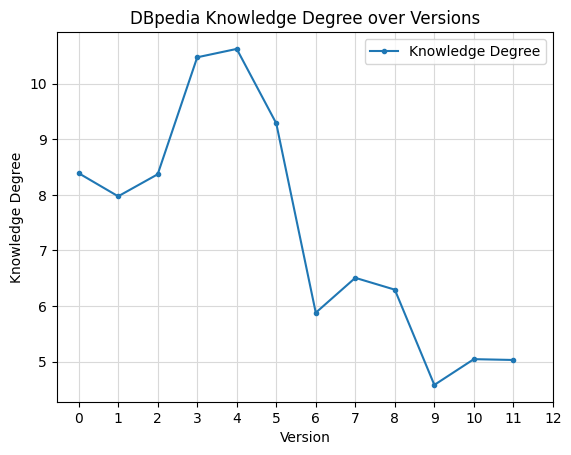

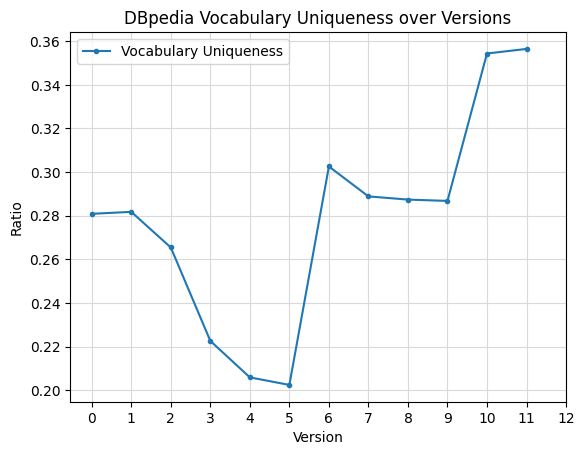

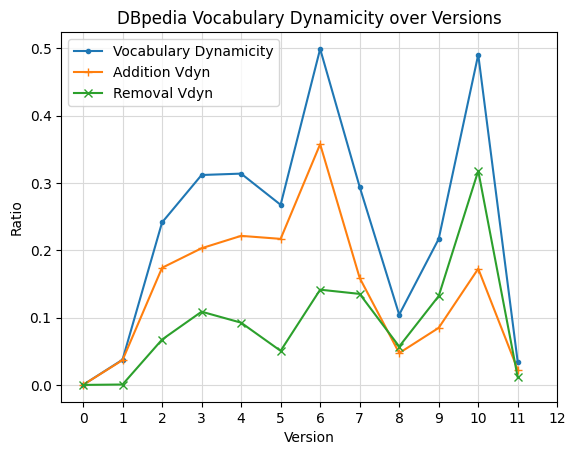

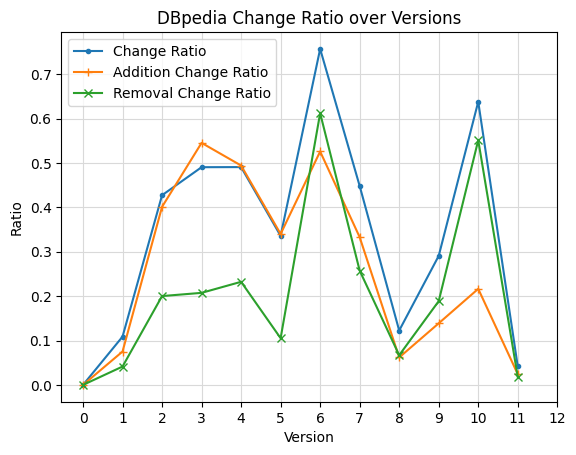

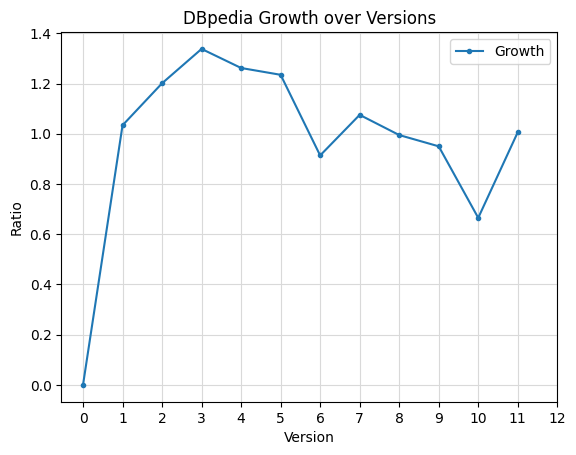

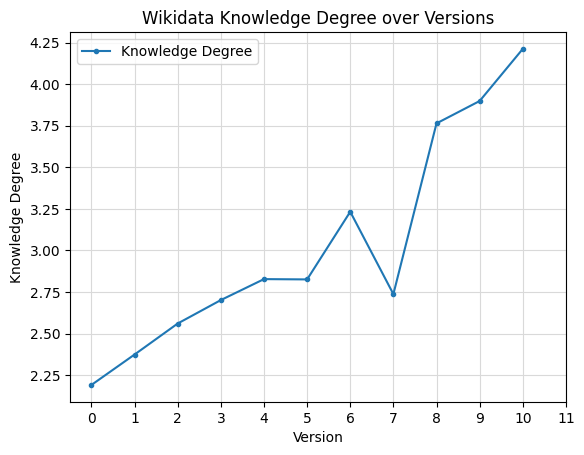

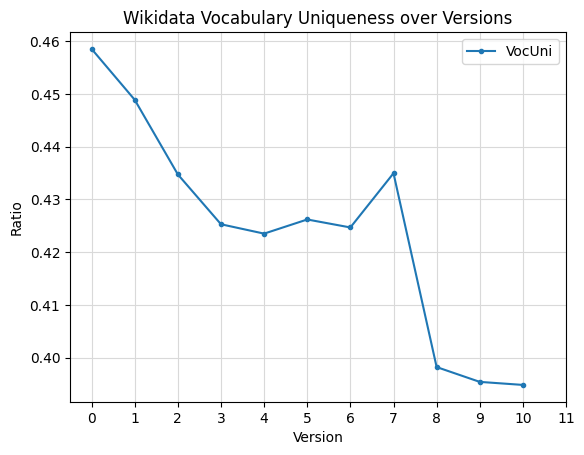

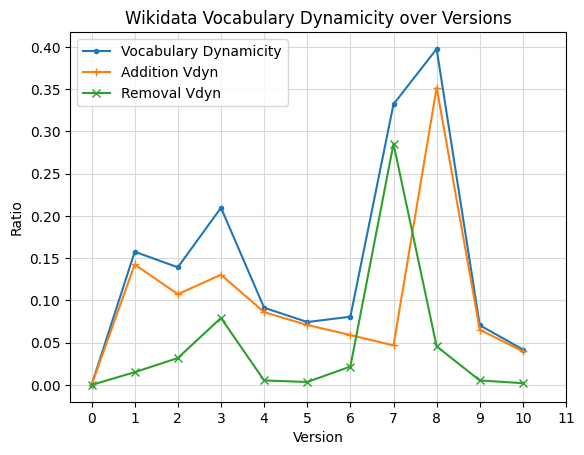

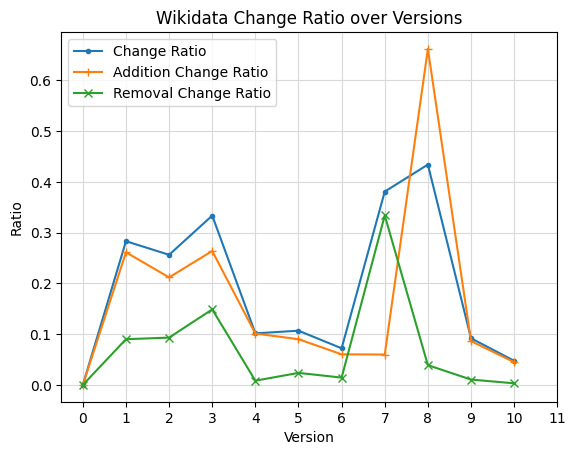

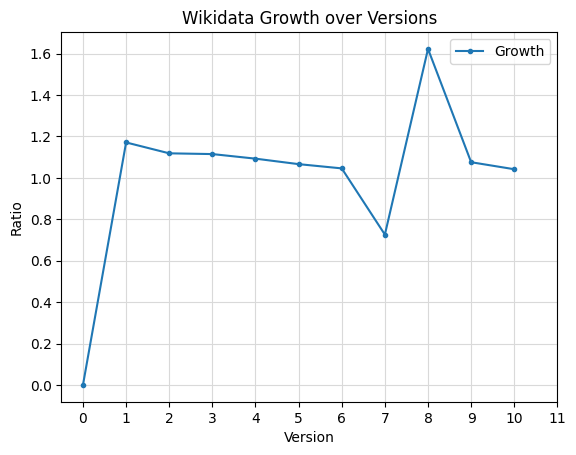

In [4]:
def plot_parameters_over_versions(df, parameters, markers, title, output_file_name, legend_mapping=None, x_label='Ratio'):
    for parameter, marker in zip(parameters, markers):
        legend_name = legend_mapping[parameter] if legend_mapping is not None else parameter
        plt.plot(df['Version'], df[parameter], marker=marker, linestyle='-', label=legend_name)

    plt.xlabel('Version')
    plt.ylabel(x_label)
    plt.title(title)
    plt.legend()
    plt.grid(axis='both', color='0.85')
    plt.xticks(np.arange(0, len(df[parameter])+1, 1))
    plt.savefig(f'plots/{output_file_name}', dpi=300, bbox_inches='tight')
    plt.show()

legend_mapping = {'KD': 'Knowledge Degree', 'VocUni': 'Vocabulary Uniqueness', 'Vdyn': 'Vocabulary Dynamicity', 'AddVdyn': 'Addition Vdyn', 'RemVdyn': 'Removal Vdyn', 'ChangeRatio': 'Change Ratio', 'AddCR': 'Addition Change Ratio', 'RemCR': 'Removal Change Ratio', 'Growth': 'Growth'}


# Plot parameters for the 'dbpedia' dataset
plot_parameters_over_versions(dbpedia_data, ['KD'], ['.'], "DBpedia Knowledge Degree over Versions", 'dbpedia_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plot_parameters_over_versions(dbpedia_data, ['VocUni'], ['.'], "DBpedia Vocabulary Uniqueness over Versions", 'dbpedia_VocUni.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'], "DBpedia Vocabulary Dynamicity over Versions", 'dbpedia_Vdyn.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'], "DBpedia Change Ratio over Versions", 'dbpedia_ChangeRatio.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['Growth'], ['.'],"DBpedia Growth over Versions", 'dbpedia_Growth.png', legend_mapping=legend_mapping)

# Plot parameters for the 'wiki' dataset
plot_parameters_over_versions(wiki_data, ['KD'], ['.'], "Wikidata Knowledge Degree over Versions", 'wiki_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plot_parameters_over_versions(wiki_data, ['VocUni'], ['.'], "Wikidata Vocabulary Uniqueness over Versions", 'wiki_VocUni.png')
plot_parameters_over_versions(wiki_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'],"Wikidata Vocabulary Dynamicity over Versions", 'wiki_Vdyn.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(wiki_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'],"Wikidata Change Ratio over Versions", 'wiki_ChangeRatio.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(wiki_data, ['Growth'], ['.'],"Wikidata Growth over Versions", 'wiki_Growth.png', legend_mapping=legend_mapping)